# Moduli

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import InstanceHardnessThreshold, NeighbourhoodCleaningRule
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

# Metodi comuni


La funzione, visualizza la matrice di correlazione come una heatmap. Prende in input un DataFrame df e utilizza la libreria Seaborn per generare una heatmap della matrice di correlazione delle colonne del DataFrame. La scala di colore della heatmap è impostata su "crest", e vengono visualizzati i valori degli indici all'interno delle celle.

In [2]:
def print_correlation_matrix(df):
    """
    Print correlation matrix as a heatmap.

    Args:
        df (DataFrame): Input DataFrame.

    Returns:
        None
    """
    plt.figure(figsize=(10, 10), dpi=100)
    sns.set_style("whitegrid")

    hm = sns.heatmap(df.corr(),
                    cmap="crest",
                    cbar=True,
                    square=True,
                    yticklabels=df.columns,
                    xticklabels=df.columns,
                    annot=True,                  #Questo ci mostra i valori degli indici
                    annot_kws={'size':12},
                    )

    plt.show()


Questa funzione, value_distribution, stampa la distribuzione dei valori per ogni colonna nel DataFrame. Prende in input un DataFrame df. Per ogni colonna, calcola il conteggio dei valori unici e la percentuale di ciascun valore rispetto al totale delle righe nel DataFrame. Queste informazioni vengono quindi stampate per ogni colonna, mostrando il valore, il conteggio e la percentuale.

In [3]:
def value_distribution(df):
    """
    Print value distribution for each column in the DataFrame.

    Args:
        df (DataFrame): Input DataFrame.

    Returns:
        None
    """
    num_rows = len(df)
    for column in df.columns:
        print("Value distribution for column:", column)
        value_counts = df[column].value_counts()
        percentages = (value_counts / num_rows) * 100
        for value, count, percent in zip(value_counts.index, value_counts, percentages):
            print(f"{value}: {count} ({percent:.2f}%)")
        print("\n")

Visualizza una matrice di confusione. Prende in input le etichette vere (y_true) e le etichette predette (y_pred). È possibile specificare anche i nomi delle etichette tramite l'argomento opzionale labels, che di default è impostato su ["Negative", "Positive"]. La matrice di confusione viene generata utilizzando la libreria Seaborn, dove le righe rappresentano le etichette vere e le colonne rappresentano le etichette predette. I valori della matrice di confusione sono mostrati all'interno delle celle della heatmap. Infine, la heatmap viene visualizzata utilizzando plt.show().

In [4]:
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"]):
    """
    Plot confusion matrix.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        labels (list, optional): List of label names. Defaults to ["Negative", "Positive"].
        show_precision_recall (bool, optional): Whether to show precision and recall. Defaults to True.

    Returns:
        None
    """
    plt.figure(figsize=(4, 4), dpi=100)
    sns.set_style("whitegrid")
    cm = confusion_matrix(y_true, y_pred)

    df_cm = pd.DataFrame(cm, index=labels,
                         columns=["Predicted " + labels[0], "Predicted " + labels[1]])
    sns.heatmap(df_cm, annot=True, fmt='g')

    plt.show()


La funzione esegue la standardizzazione delle features utilizzando StandardScaler. Prende in input i dati di addestramento (X_train) e i dati di test (X_test) come array-like. StandardScaler viene applicato ai dati di addestramento per calcolare la media e la deviazione standard e successivamente standardizzare i dati. Questi parametri vengono quindi utilizzati per standardizzare anche i dati di test. La funzione restituisce una tupla contenente i dati di addestramento e di test standardizzati.

In [5]:
def scale_features(X_train, X_test):
    """
    Scale features using StandardScaler.

    Args:
        X_train (array-like): Training data.
        X_test (array-like): Test data.

    Returns:
        Tuple: Scaled training and test data.
    """
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    return X_train_scaled, X_test_scaled

La funzione visualizza la curva ROC (Receiver Operating Characteristic). Prende in input le etichette vere per i dati di test (y_test) e le probabilità predette per i dati di test (y_proba_test). Utilizzando queste informazioni, la funzione calcola il tasso di falsi positivi (fpr), il tasso di veri positivi (tpr) e le soglie di classificazione. Successivamente, calcola l'area sotto la curva ROC (AUC) e traccia la curva ROC utilizzando la libreria matplotlib. Infine, la curva ROC viene visualizzata utilizzando plt.show().

In [6]:
def plot_roc_curve(y_test, y_proba_test):
    """
    Plot ROC curve.

    Args:
        y_test (array-like): True labels for test data.
        y_proba_test (array-like): Predicted probabilities for test data.

    Returns:
        None
    """
    fpr, tpr, thresholds = roc_curve(y_test, y_proba_test[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

 La funzione valuta il modello addestrato. Prende in input le etichette vere per i dati di addestramento (y_train) e di test (y_test), così come le etichette predette per i dati di addestramento (y_pred_train) e di test (y_pred_test). Utilizzando queste informazioni, la funzione stampa due report di classificazione, uno per i dati di addestramento e uno per i dati di test, che includono metriche come precisione, richiamo e F1-score per ciascuna classe. Inoltre, la funzione stampa le matrici di confusione per i dati di addestramento e di test utilizzando la funzione plot_confusion_matrix. Infine, la funzione non restituisce alcun valore, ma stampa semplicemente i report e le matrici di confusione.

In [7]:
def evaluate_model(y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the trained model.

    Args:
        y_train (array-like): True labels for training data.
        y_test (array-like): True labels for test data.
        y_pred_train (array-like): Predicted labels for training data.
        y_pred_test (array-like): Predicted labels for test data.

    Returns:
        None
    """
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    print("TRAIN CONFUSION MATRIX")
    plot_confusion_matrix(y_train, y_pred_train)
    print("TEST CONFUSION MATRIX")
    plot_confusion_matrix(y_test, y_pred_test)

La funzione costruisce e valuta un modello di regressione logistica. Prende in input le feature di addestramento (X_train) e di test (X_test), così come le etichette di addestramento (y_train) e di test (y_test). È possibile specificare i pesi delle classi tramite l'argomento opzionale class_weight, che di default è impostato su "balanced".

La funzione inizia scalando le features di addestramento e di test utilizzando la funzione scale_features. Successivamente, crea un modello di regressione logistica utilizzando la classe LogisticRegression da scikit-learn, specificando i pesi delle classi. Il modello viene quindi addestrato sui dati di addestramento standardizzati.

Dopo l'addestramento del modello, vengono effettuate predizioni sia sui dati di addestramento che su quelli di test utilizzando il modello addestrato. Le probabilità predette vengono calcolate utilizzando il metodo predict_proba. Successivamente, vengono tracciate le curve ROC utilizzando la funzione plot_roc_curve e valutato il modello utilizzando la funzione evaluate_model, che stampa report di classificazione e matrici di confusione per i dati di addestramento e di test.

Infine, la funzione restituisce il modello di regressione logistica addestrato.

In [8]:
def build_model(X_train, X_test, y_train, y_test, class_weight="balanced") -> LogisticRegression:
    """
    Build and evaluate a logistic regression model.

    Args:
        X_train (array-like): Training features.
        X_test (array-like): Test features.
        y_train (array-like): Training labels.
        y_test (array-like): Test labels.
        class_weight (str, optional): Class weights for Logistic Regression. Defaults to "balanced".

    Returns:
        LogisticRegression: Trained logistic regression model.
    """
    X_train_scaled, X_test_scaled = scale_features(X_train, X_test)

    lr = LogisticRegression(class_weight=class_weight, max_iter=2000)
    lr.fit(X_train_scaled, y_train)

    y_pred_train = lr.predict(X_train_scaled)
    y_proba_train = lr.predict_proba(X_train_scaled)
    y_pred_test = lr.predict(X_test_scaled)
    y_proba_test = lr.predict_proba(X_test_scaled)
    plot_roc_curve(y_test, y_proba_test)
    evaluate_model(y_train, y_test, y_pred_train, y_pred_test)

    return lr


# Caricamento dataset

Carico il dataset e successivamente, mostro le prime righe del DataFrame per ottenere un'anteprima dei dati.

In [9]:
BASE_URL="https://proai-datasets.s3.eu-west-3.amazonaws.com/"
df = pd.read_csv(BASE_URL+"insurance_cross_sell.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Cancellazione colonne e pulizia dataset


Elimino la colonna "id" dal DataFrame 'df' e successivamente ottengo un riepilogo statistico delle colonne numeriche rimanenti con il metodo describe().

In [10]:
df = df.drop("id", axis=1)
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Controllo colonne null

Calcolo il numero di valori nulli per ciascuna colonna nel DataFrame 'df' utilizzando il metodo isnull().sum(). Questo ci fornisce un conteggio delle celle vuote per ogni colonna, aiutandoci a identificare eventuali dati mancanti nel dataset.

In [11]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# Feature engineering

Eseguo il mapping delle variabili categoriche a valori numerici utilizzando dei dizionari. Viene definito un dizionario gender_map per mappare i valori "Male" e "Female" a 1 e 2 rispettivamente nella colonna "Gender".

Allo stesso modo, viene definito un dizionario vehicle_age_map per mappare i valori "< 1 Year", "1-2 Year", e "> 2 Years" a 1, 2, e 3 rispettivamente nella colonna "Vehicle_Age". Infine, viene definito un dizionario vehicle_damage_map per mappare i valori.


---


**E' stato anche testato l'approccio OneShotEncoding, ma il modello è risultato essere più preciso con il label encoding.**


---



In [12]:
# Map categorical variables to numerical values using dictionaries.
gender_map = {"Male": 1, "Female": 2}
df["Gender"] = df["Gender"].map(lambda x: gender_map[x])

vehicle_age_map = {"< 1 Year": 1, "1-2 Year": 2, "> 2 Years": 3}
df["Vehicle_Age"] = df["Vehicle_Age"].map(lambda x: vehicle_age_map[x])

vehicle_damage_map = {"Yes": 1, "No": 0}
df["Vehicle_Damage"] = df["Vehicle_Damage"].map(lambda x: vehicle_damage_map[x])

In [13]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,2,29,1,41.0,1,1,0,27496.0,152.0,39,0


Matrice di correlazione iniziale

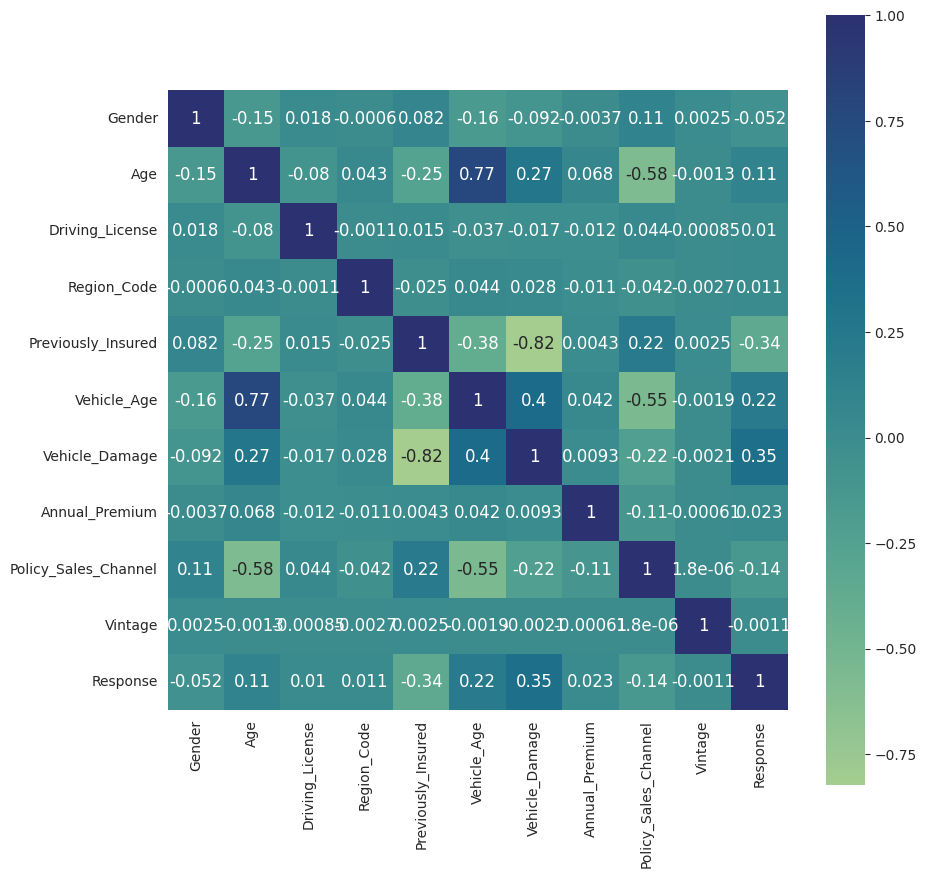

In [ ]:
print_correlation_matrix(df)

## Data exploration e ragguppamento in classi

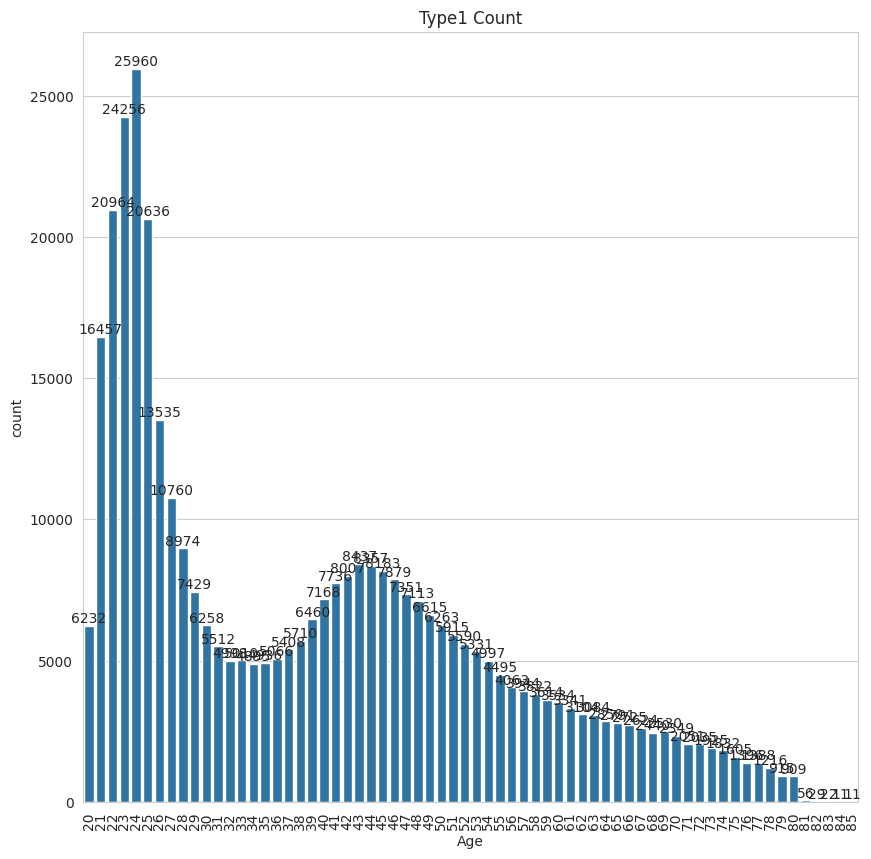

In [ ]:

plt.figure(figsize=(10, 10), dpi=100)
countplot=sns.countplot(data=df,x="Age")
for count in countplot.containers:
    countplot.bar_label(count,)

plt.xticks(rotation=90)
plt.title("Type1 Count")
plt.show()

Definisco gli intervalli per la suddivisione dell'età, inclusi gli intervalli per fasce di età specifiche fino a 65 anni e un intervallo finale per età maggiori di 65. Successivamente, suddivide l'età in queste fasce di età utilizzando pd.cut() e assegna una classe a ciascuna riga del DataFrame df.

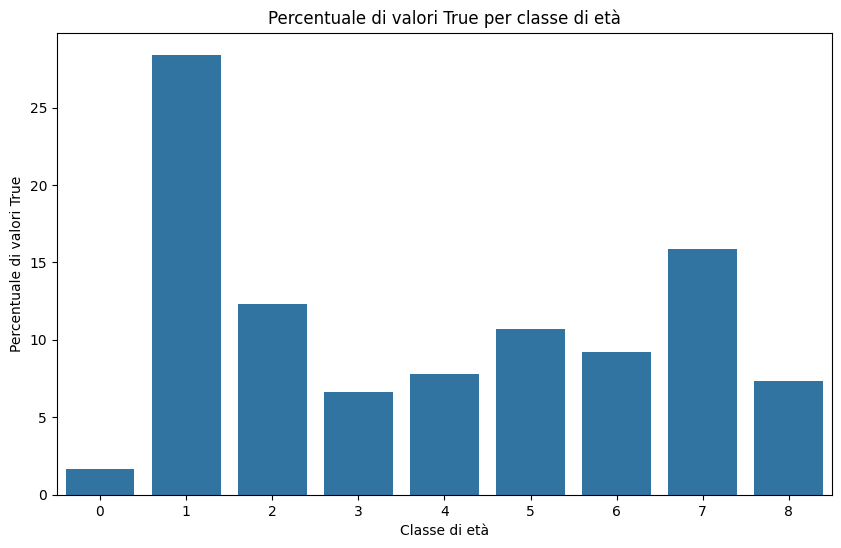

In [16]:

# Definisci gli intervalli per la suddivisione dell'età, includendo un intervallo finale per età maggiori di 70
intervalls_age = [0, 20, 25, 30, 35, 40, 45, 50, 65, float('inf')]

# Suddividi l'età in intervalli e assegna la classe a ciascuna riga
df['Age_Class'] = pd.cut(df['Age'], bins=intervalls_age, labels=range(len(intervalls_age)-1))

# Calcola la percentuale di valori True per ciascuna classe di età
percentages = df.groupby('Age_Class')['Response'].count() / len(df) * 100

# Visualizza i risultati
plt.figure(figsize=(10, 6))
sns.barplot(x=percentages.index, y=percentages.values)
plt.xlabel('Classe di età')
plt.ylabel('Percentuale di valori True')
plt.title('Percentuale di valori True per classe di età')
plt.show()


Elimino la colonna raggrupata per classi

In [17]:
df = df.drop(["Age"], axis = 1)

Definisco gli intervalli per la suddivisione dei mesi di anzianità da 0 al massimo per steps di 25.

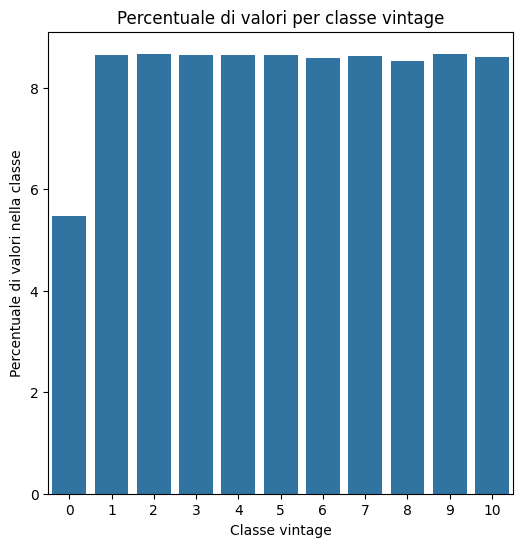

In [18]:

intervalli_vintage = range(0, 300, 25)

df['Vintage_Class'] = pd.cut(df['Vintage'], bins=intervalli_vintage, labels=range(len(intervalli_vintage)-1))

# Calcola la percentuale di valori True per ciascuna classe di età
percentuali = df.groupby('Vintage_Class')['Vintage'].count() / len(df) * 100

# Visualizza i risultati
plt.figure(figsize=(6, 6))
sns.barplot(x=percentuali.index, y=percentuali.values)
plt.xlabel('Classe vintage')
plt.ylabel('Percentuale di valori nella classe')
plt.title('Percentuale di valori per classe vintage')
plt.show()


Dalla suddivisione sottostante si evince che il numero di assicurati per anzianità è omogeneo così come lo è la percentuale di persone che scelgono o meno di stipulare la polizza aggiuntiva.

Non dando alcun valore al modello si esclude quindi la variabile Vintage e la sua classe

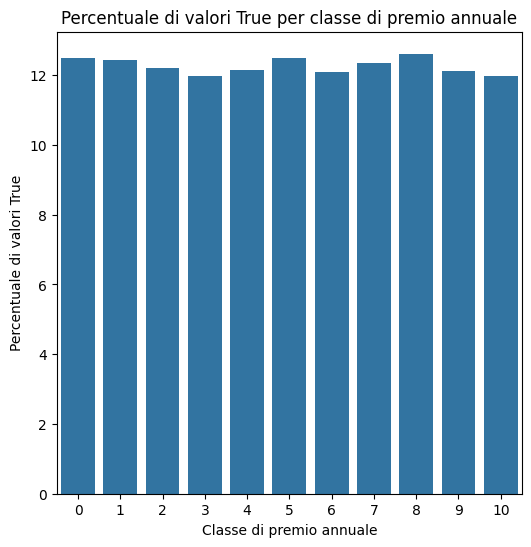

In [19]:
# Calcola la percentuale di valori True per ciascuna classe di età
percentuali = df.groupby('Vintage_Class')['Response'].mean() * 100

# Visualizza i risultati
plt.figure(figsize=(6, 6))
sns.barplot(x=percentuali.index, y=percentuali.values)
plt.xlabel('Classe di premio annuale')
plt.ylabel('Percentuale di valori True')
plt.title('Percentuale di valori True per classe di premio annuale')
plt.show()

In [20]:
df = df.drop(["Vintage", "Vintage_Class"], axis = 1)

Definisco gli intervalli per la suddivisione dell'Annual_Premium e assegna una classe a ciascuna riga del DataFrame df in base all'Annual_Premium. La funzione pd.cut() viene utilizzata per suddividere l'Annual_Premium in intervalli specificati dagli intervalli_premium e assegnare una classe a ciascuna riga. Successivamente, vengono calcolate le percentuali di valori per ciascuna classe di Annual_Premium utilizzando groupby() e count(), e dividendo per la lunghezza totale del DataFrame. Infine, i risultati vengono visualizzati tramite un grafico a barre utilizzando la libreria Seaborn, mostrando la percentuale di valori per ciascuna classe di Annual_Premium.

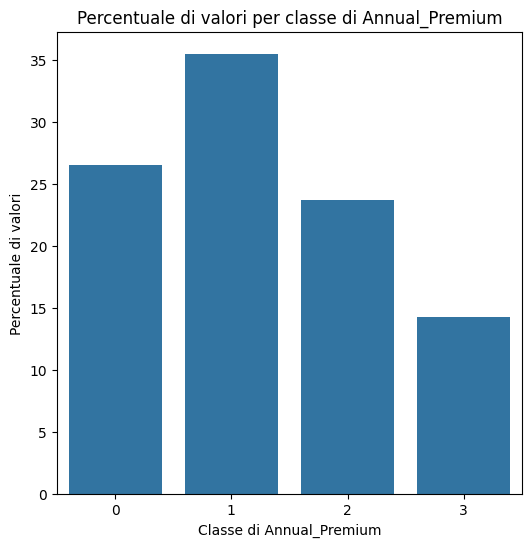

In [21]:
# Definisci gli intervalli per la suddivisione dell'Annual_Premium
intervalli_premium = [0, 25000, 35000, 45000, float('inf')]
# Suddividi l'Annual_Premium in intervalli e assegna la classe a ciascuna riga
df['Annual_Premium_class'] = pd.cut(df['Annual_Premium'], bins=intervalli_premium, labels=range(len(intervalli_premium)-1))

# Calcola la percentuale di valori per ciascuna classe di Annual_Premium
percentuali_premium = df.groupby('Annual_Premium_class')['Annual_Premium'].count() / len(df) * 100

# Visualizza i risultati
plt.figure(figsize=(6, 6))
sns.barplot(x=percentuali_premium.index, y=percentuali_premium.values)
plt.xlabel('Classe di Annual_Premium')
plt.ylabel('Percentuale di valori')
plt.title('Percentuale di valori per classe di Annual_Premium')
plt.show()

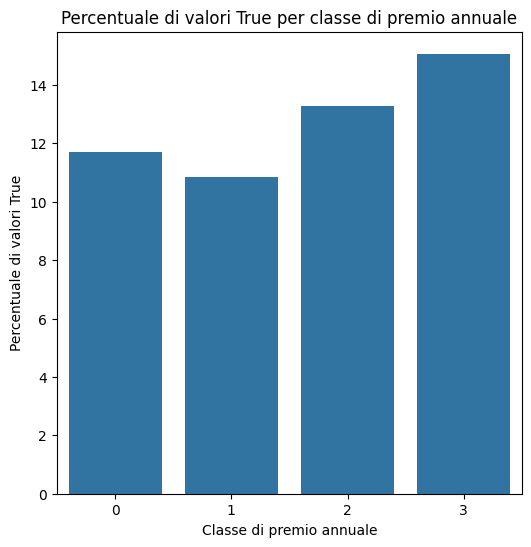

In [22]:
# Calcola la percentuale di valori True per ciascuna classe di età
percentuali = df.groupby('Annual_Premium_class')['Response'].mean() * 100

# Visualizza i risultati
plt.figure(figsize=(6, 6))
sns.barplot(x=percentuali.index, y=percentuali.values)
plt.xlabel('Classe di premio annuale')
plt.ylabel('Percentuale di valori True')
plt.title('Percentuale di valori True per classe di premio annuale')
plt.show()

Elimino la colonna non che è stata raggruppata per classe

In [23]:
df = df.drop(["Annual_Premium"], axis = 1)

## Matrice di correlazione

### Full Dataset


L'analisi della matrice di correlazione è stata eseguita per identificare le relazioni tra le variabili nel dataset. Questo è importante per individuare la presenza di multicollinearità

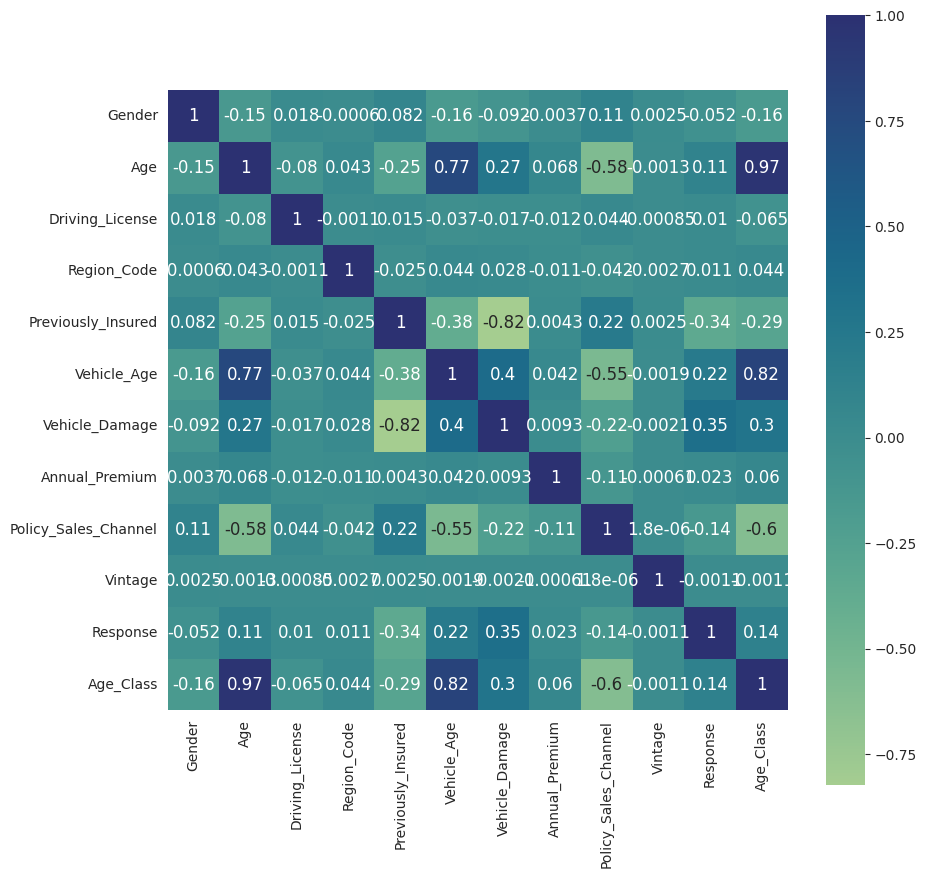

In [ ]:
print_correlation_matrix(df)

### Dataset filtrato

Il codice calcola e visualizza la matrice di correlazione per il DataFrame df, escludendo alcune colonne specificate (come "Age", "Annual_Premium", ecc.). La funzione drop() viene utilizzata per rimuovere le colonne specificate, mentre la funzione print_correlation_matrix() viene utilizzata per visualizzare la matrice di correlazione. La matrice di correlazione fornisce informazioni sul grado di correlazione tra le diverse variabili nel DataFrame, il che può essere utile per comprendere le relazioni tra le variabili e identificare potenziali pattern nei dati.

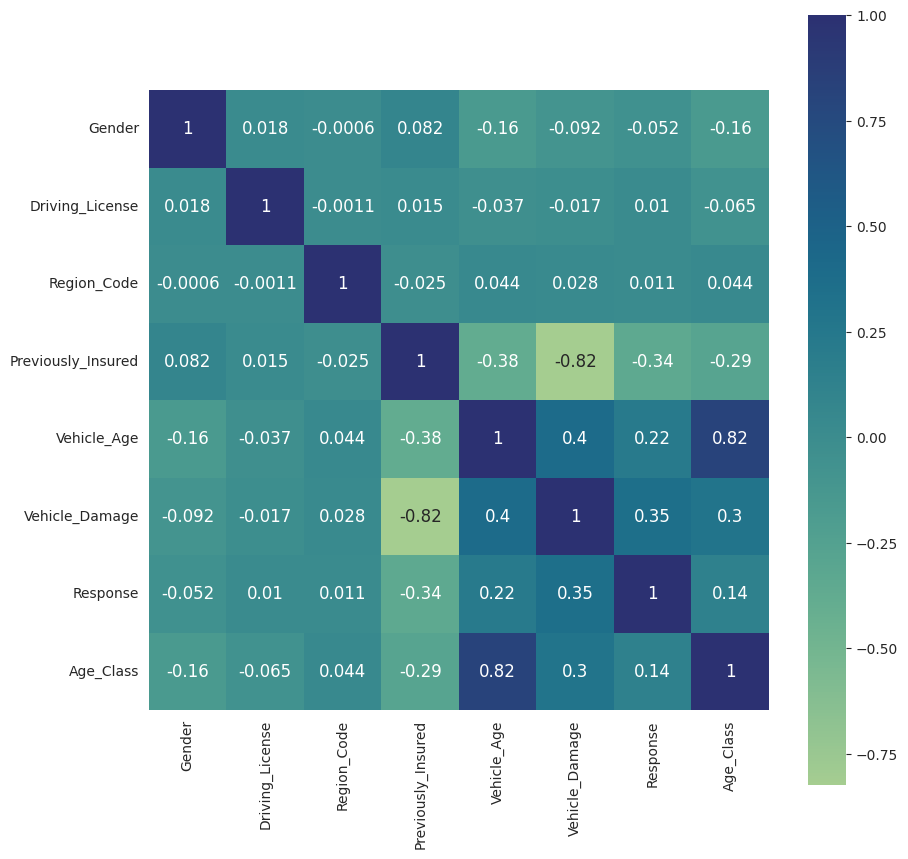

In [ ]:
print_correlation_matrix(df.drop(["Annual_Premium_class", "Policy_Sales_Channel"], axis=1))

In [24]:
value_distribution(df)

Value distribution for column: Gender
1: 206089 (54.08%)
2: 175020 (45.92%)


Value distribution for column: Driving_License
1: 380297 (99.79%)
0: 812 (0.21%)


Value distribution for column: Region_Code
28.0: 106415 (27.92%)
8.0: 33877 (8.89%)
46.0: 19749 (5.18%)
41.0: 18263 (4.79%)
15.0: 13308 (3.49%)
30.0: 12191 (3.20%)
29.0: 11065 (2.90%)
50.0: 10243 (2.69%)
3.0: 9251 (2.43%)
11.0: 9232 (2.42%)
36.0: 8797 (2.31%)
33.0: 7654 (2.01%)
47.0: 7436 (1.95%)
35.0: 6942 (1.82%)
6.0: 6280 (1.65%)
45.0: 5605 (1.47%)
37.0: 5501 (1.44%)
18.0: 5153 (1.35%)
48.0: 4681 (1.23%)
14.0: 4678 (1.23%)
39.0: 4644 (1.22%)
10.0: 4374 (1.15%)
21.0: 4266 (1.12%)
2.0: 4038 (1.06%)
13.0: 4036 (1.06%)
7.0: 3279 (0.86%)
12.0: 3198 (0.84%)
9.0: 3101 (0.81%)
27.0: 2823 (0.74%)
32.0: 2787 (0.73%)
43.0: 2639 (0.69%)
17.0: 2617 (0.69%)
26.0: 2587 (0.68%)
25.0: 2503 (0.66%)
24.0: 2415 (0.63%)
38.0: 2026 (0.53%)
0.0: 2021 (0.53%)
16.0: 2007 (0.53%)
31.0: 1960 (0.51%)
23.0: 1960 (0.51%)
20.0: 1935 (0.51%)
49.0: 1832 (0.

## Esplorazione dei dati


Questi risultati mostrano la percentuale di risposte positive (True) per ciascuna classe di premio annuale. Si nota un aumento generale della percentuale di risposte positive all'aumentare della classe di premio annuale. Questo potrebbe suggerire una relazione tra il livello del premio annuale e la propensione dei clienti a rispondere positivamente.

In [25]:
# Calculate the mean response rate grouped by annual premium class
response_percentages = df.groupby('Annual_Premium_class')['Response'].mean() * 100

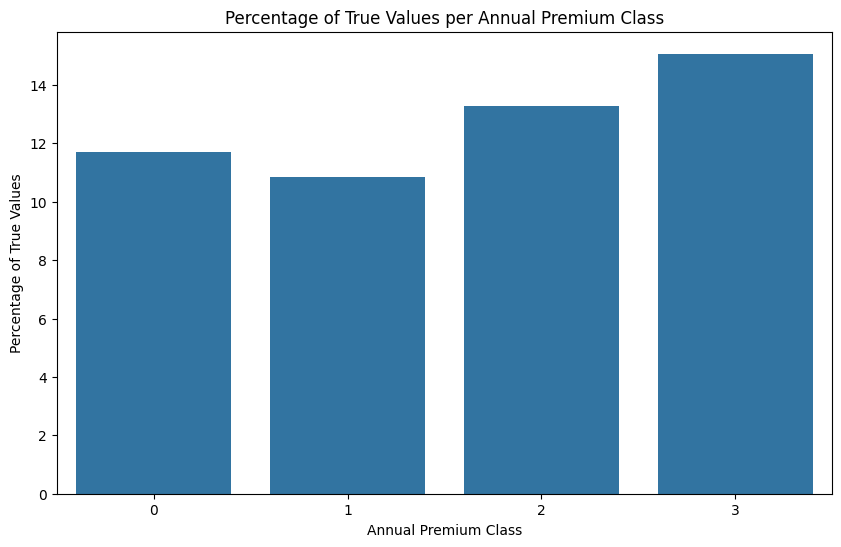

In [26]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=response_percentages.index, y=response_percentages.values)
plt.xlabel('Annual Premium Class')
plt.ylabel('Percentage of True Values')
plt.title('Percentage of True Values per Annual Premium Class')
plt.show()


I risultati indicano la percentuale di risposte positive (True) per ciascuna classe di età. La percentuale di risposte positive sembra aumentare fino alla classe di età 5, rimanendo piuttosto costante tra le classi di età 4, 5 e 6, e poi diminuisce progressivamente. Questo può indicare che i clienti in età più avanzata ma ancora under 50 tendono a rispondere positivamente in maggiori occasioni.

In [27]:
response_percentages = df.groupby('Age_Class')['Response'].mean() * 100
response_percentages

Age_Class
0     2.743902
1     3.579840
2     6.678593
3    19.967654
4    21.920703
5    21.259823
6    20.919338
7    15.824721
8     8.318786
Name: Response, dtype: float64

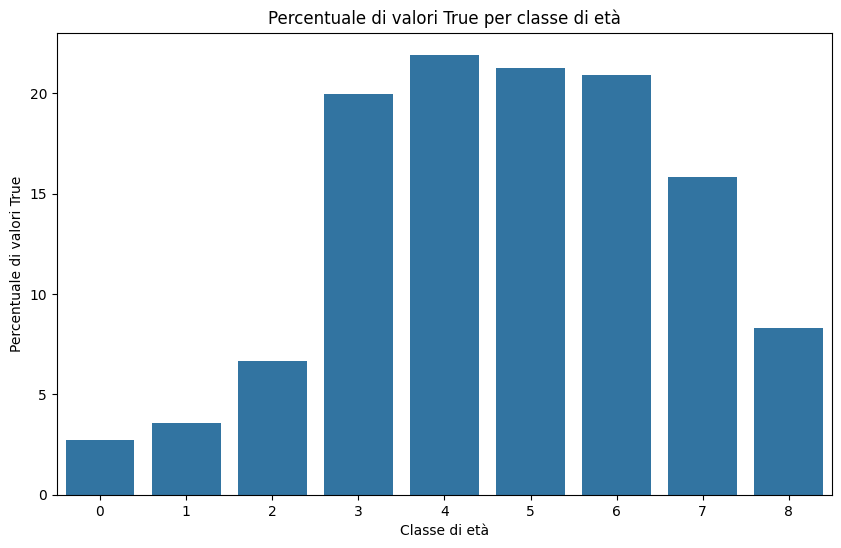

In [28]:
# Visualizza i risultati
plt.figure(figsize=(10, 6))
sns.barplot(x=response_percentages.index, y=response_percentages.values)
plt.xlabel('Classe di età')
plt.ylabel('Percentuale di valori True')
plt.title('Percentuale di valori True per classe di età')
plt.show()

Dalla matrice di correlazione viene mostrato che le colonne 'Previously_Insured' e 'Vehicle_Damage' sono fortemente correlate negativamente, è stata quindi creata una nuova colonna che sostituisce le prime due che è valorizzata a true se il cliente è un nuovo assicurato con il veicolo precedentemente danneggiato

In [29]:
df['New_Insured_With_Vehicle_Damage'] = (df['Previously_Insured'] == False) & (df['Vehicle_Damage'] == True)



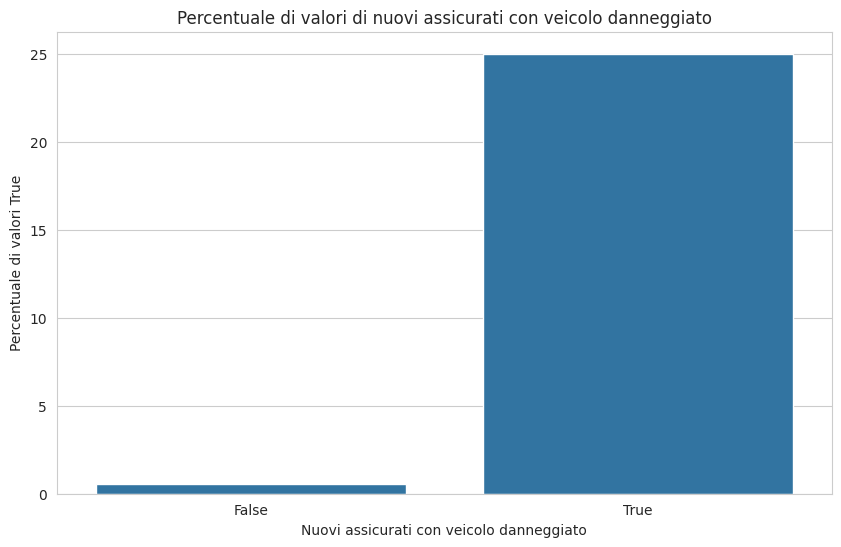

In [ ]:
# Calcola la percentuale di valori True per ciascuna classe di età
percentuali = df.groupby('New_Insured_With_Vehicle_Damage')['Response'].mean() * 100

# Visualizza i risultati
plt.figure(figsize=(10, 6))
sns.barplot(x=percentuali.index, y=percentuali.values)
plt.xlabel('Nuovi assicurati con veicolo danneggiato')
plt.ylabel('Percentuale di valori True')
plt.title('Percentuale di valori di nuovi assicurati con veicolo danneggiato')
plt.show()

In [30]:
df = df.drop(['Previously_Insured','Vehicle_Damage'], axis = 1)


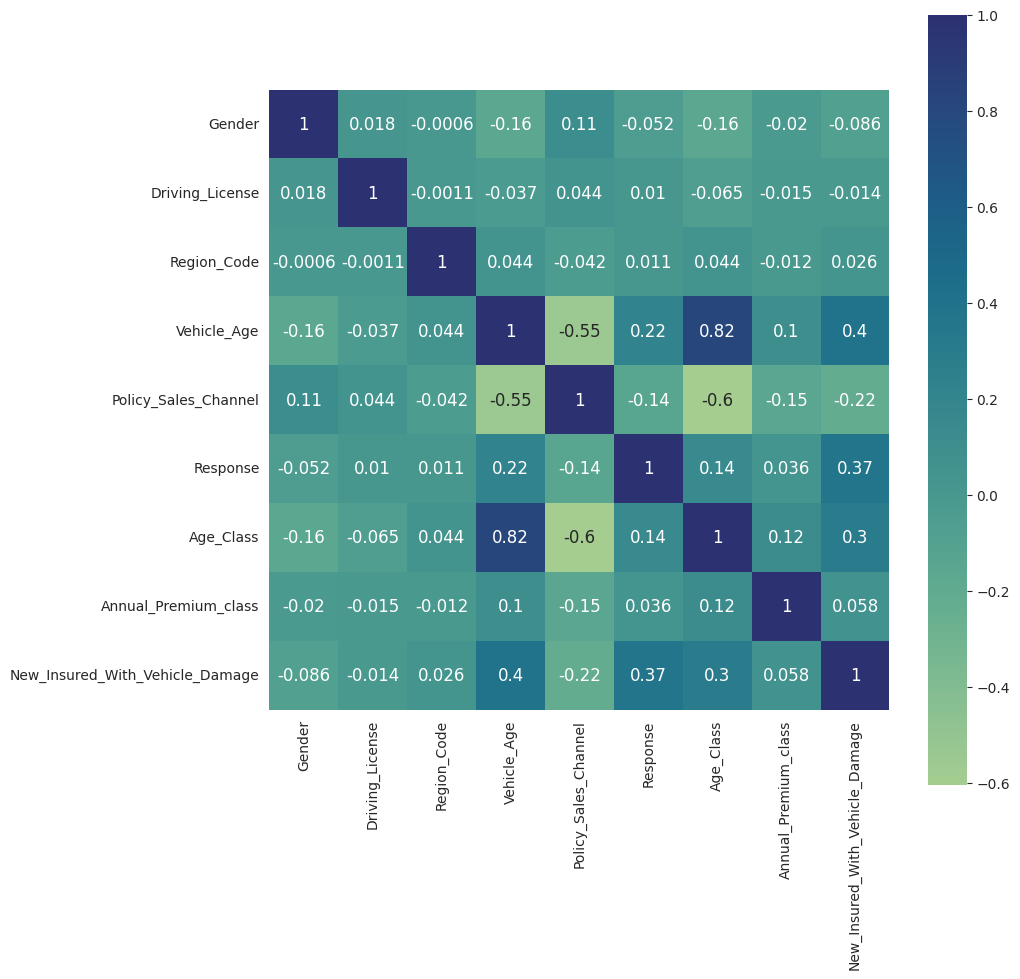

In [ ]:
print_correlation_matrix(df)

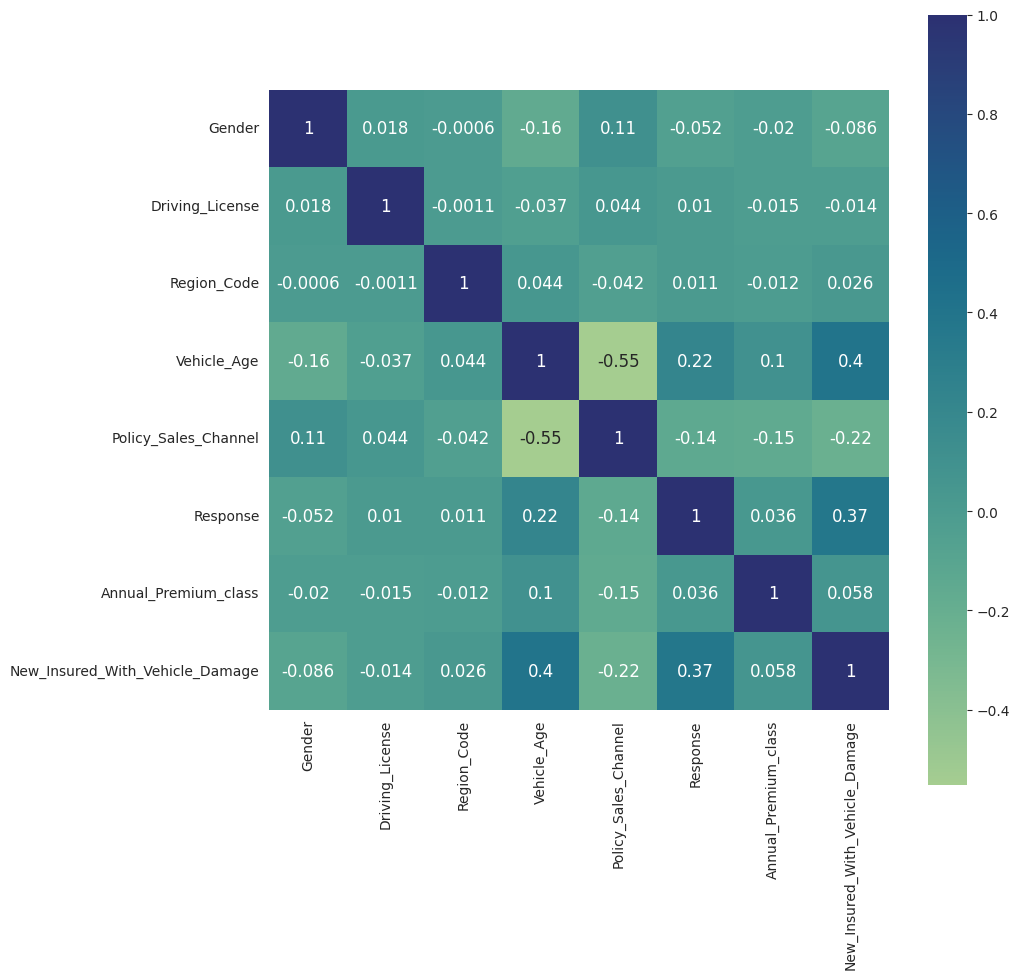

In [ ]:
print_correlation_matrix(df.drop(["Age_Class"], axis=1))

## Dataset per l'identificazione del modello

 Creo le variabili X e y per l'addestramento del modello. La variabile X contiene le features del dataset, escludendo la variabile target ("Response") e altre colonne correlate ("Age", "Annual_Premium", ecc.), mentre la variabile y contiene la variabile target ("Response"). I valori di X sono ottenuti utilizzando il metodo drop() per rimuovere le colonne specificate, e quindi estratti come array NumPy utilizzando il metodo values(). I valori di y sono ottenuti estrapolando la colonna "Response" come array NumPy utilizzando il metodo values(). Questo prepara i dati per l'addestramento del modello, con le features e le etichette correttamente separate.

 E' stato scelto di eliminare le seguenti colonne dal dataset df2:
 - Age_Class: perchè troppo correlata alla variabile Vehicle_Age e meno correlata di quest'ultima alla variabile target
 - Policy_Sales_Channel: perchè troppo correlata alla variabile Vehicle_Age e meno correlata di quest'ultima alla variabile target
 - Region_Code: molteplicità molto elevata della classe e colonna totalmente inutile

 E inserito il risultato in un secondo dataset che ci servirà poi per addestrare e scegliere un modello con dati meno correlati tra loro


---
***Altre osservazioni:***

Abbiamo due dataset, il primo (df) con più variabili che potrebbero problemi di multicollinearità e un secondo dataset (df2) che ha meno informazioni e la molteplicità delle classi al suo interno è stata ridotta.


---




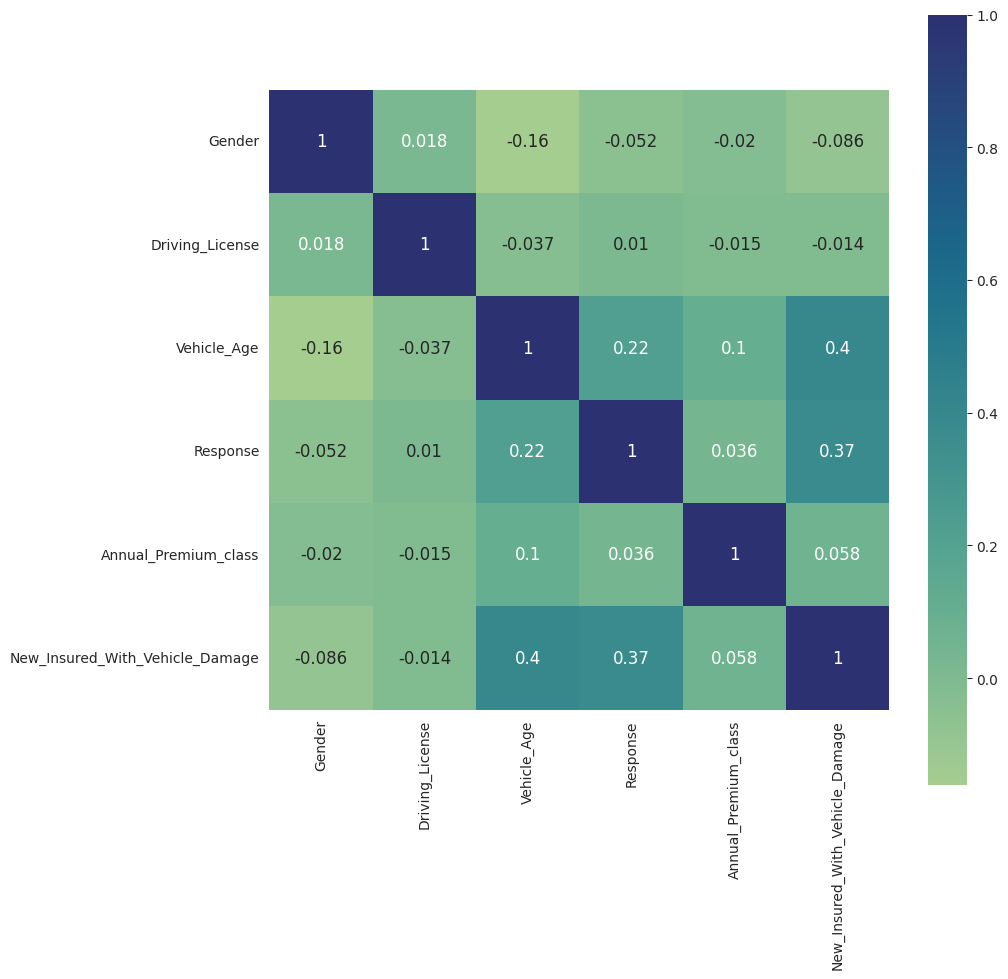

In [31]:
df2 = df.drop(["Age_Class", "Policy_Sales_Channel", "Region_Code"], axis=1)
print_correlation_matrix(df2)


In [32]:
X = df.drop(["Response"], axis=1).values
y = df["Response"].values

X_2 = df2.drop(["Response"], axis=1).values
y_2 = df2["Response"].values




# Classification models

## Balanced


Questo codice suddivide il dataset in set di addestramento e di test utilizzando la funzione train_test_split() dalla libreria scikit-learn. I dati vengono divisi in features (X) e target (y), e poi suddivisi in set di addestramento e di test in un rapporto specificato (in questo caso, 80% addestramento e 20% test) utilizzando test_size=.2. Il parametro random_state viene impostato su 0 per garantire riproducibilità.

Successivamente, il modello viene costruito utilizzando la funzione build_model(), passando i set di addestramento e di test insieme al parametro opzionale class_weight impostato su "balanced" per gestire eventuali sbilanciamenti di classe. Questo processo addestra il modello di regressione logistica e valuta le prestazioni utilizzando le metriche specificate nella funzione evaluate_model(), incluse le curve ROC e le matrici di confusione.


### Non filtrato

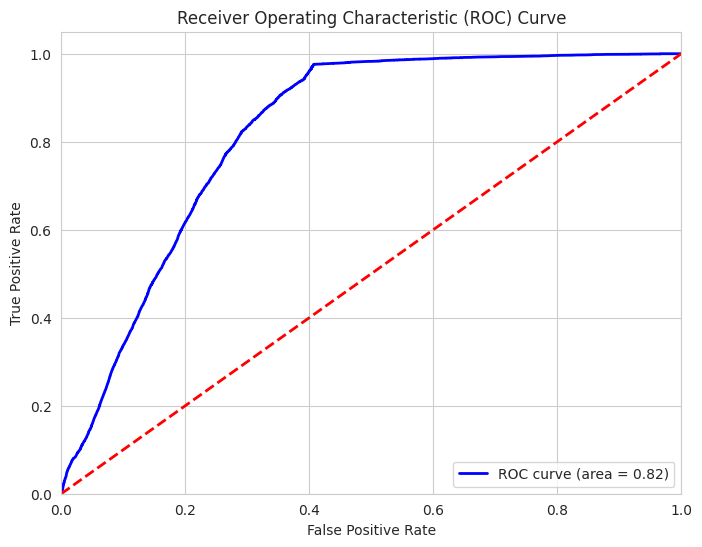

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    267519
           1       0.25      0.98      0.40     37368

    accuracy                           0.64    304887
   macro avg       0.62      0.78      0.57    304887
weighted avg       0.90      0.64      0.70    304887

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

TRAIN CONFUSION MATRIX


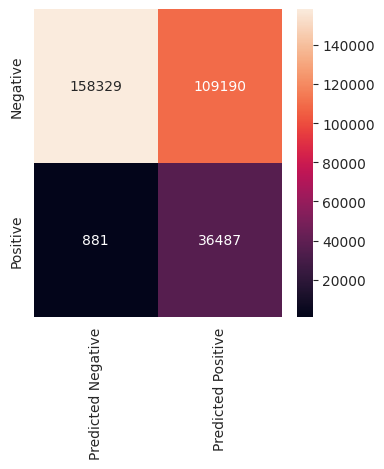

TEST CONFUSION MATRIX


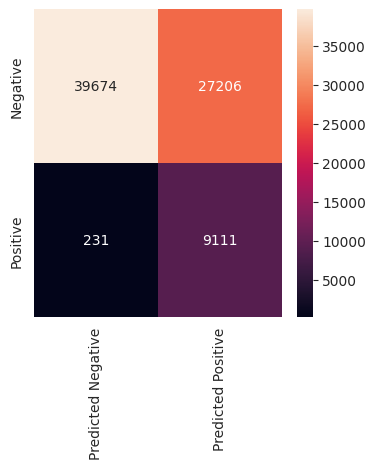

LogisticRegression(class_weight='balanced', max_iter=2000)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify = y)

build_model(X_train, X_test, y_train, y_test, "balanced")

### Filtrato

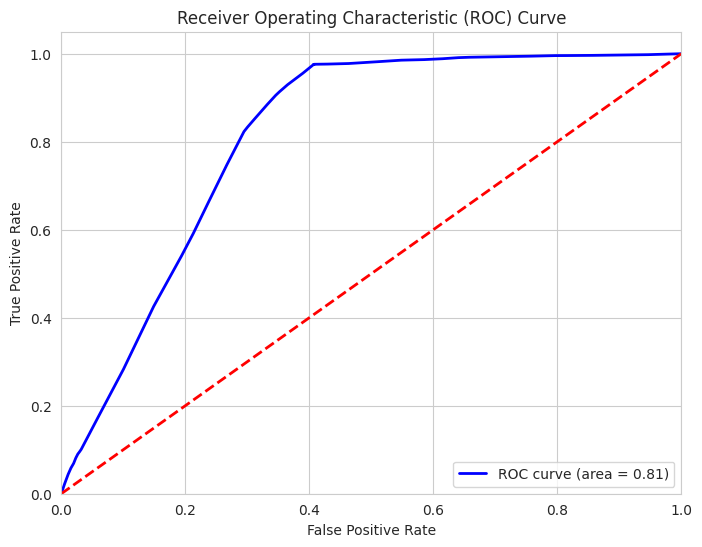

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    267519
           1       0.25      0.98      0.40     37368

    accuracy                           0.64    304887
   macro avg       0.62      0.78      0.57    304887
weighted avg       0.90      0.64      0.70    304887

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

TRAIN CONFUSION MATRIX


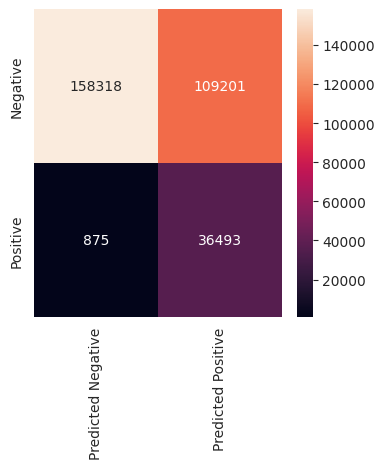

TEST CONFUSION MATRIX


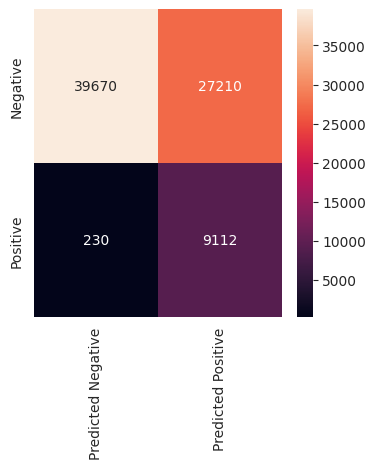

LogisticRegression(class_weight='balanced', max_iter=2000)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=.2, random_state=0, stratify = y)

build_model(X_train, X_test, y_train, y_test, "balanced")

### Conclusioni
I due dataset non hanno differenze significative, è stata esclusa l'esecuzione con il parametro class_weight=None in quanto i risultati sono totalmente sballati e inutili ai fini di business.

In generale, i risultati indicano che il modello ha buone prestazioni nella predizione della classe negativa, ma ha notevoli difficoltà nella predizione della classe positiva.

## Undersampling strategies

L'implementazione dell'undersampling è stata utilizzata per affrontare lo squilibrio di classe nel set di addestramento. Dopo aver applicato l'undersampling, il modello è stato riaddestrato utilizzando i dati bilanciati e valutato sui dati di test. Questo approccio è utile per affrontare lo squilibrio di classe riducendo il numero di esempi dalla classe maggioritaria in modo da bilanciarlo con la classe minoritaria.

### NeighbourhoodCleaningRule

#### Non filtrato

In [14]:
ncr = NeighbourhoodCleaningRule(n_neighbors=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify = y)

X_resampled_NeighbourhoodCleaningRule, y_resampled_NeighbourhoodCleaningRule = ncr.fit_resample(X_train, y_train)

build_model(X_resampled_NeighbourhoodCleaningRule, X_test, y_resampled_NeighbourhoodCleaningRule, y_test, "balanced")

NameError: name 'X' is not defined

#### Filtrato

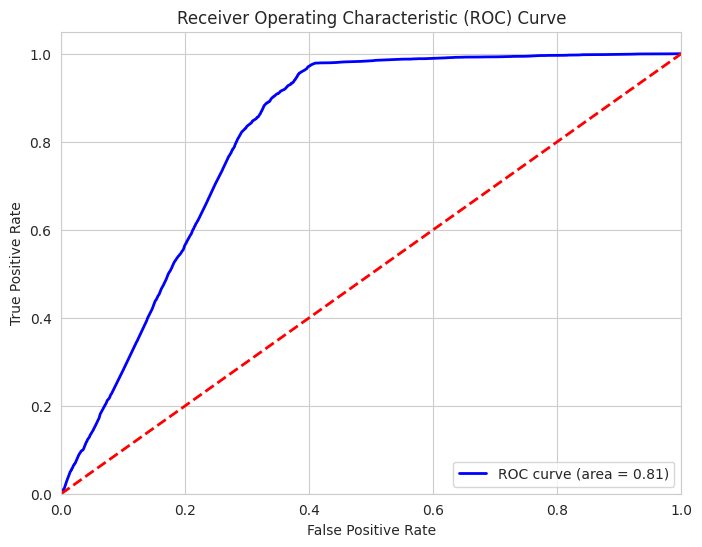

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.61      0.76    253340
           1       0.27      0.98      0.42     37334

    accuracy                           0.66    290674
   macro avg       0.63      0.79      0.59    290674
weighted avg       0.90      0.66      0.71    290674

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66846
           1       0.25      0.98      0.40      9376

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

TRAIN CONFUSION MATRIX


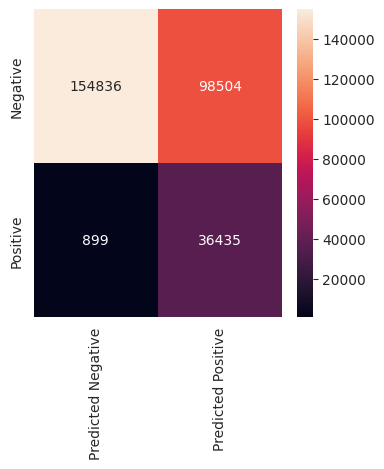

TEST CONFUSION MATRIX


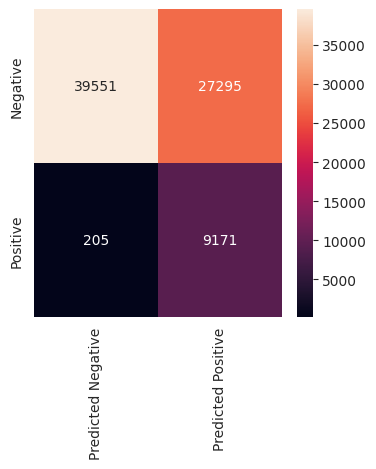

LogisticRegression(class_weight='balanced')

In [ ]:
ncr = NeighbourhoodCleaningRule(n_neighbors=11)
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=.2, random_state=0)

X_resampled_NeighbourhoodCleaningRule, y_resampled_NeighbourhoodCleaningRule = ncr.fit_resample(X_train, y_train)

build_model(X_resampled_NeighbourhoodCleaningRule, X_test, y_resampled_NeighbourhoodCleaningRule, y_test, "balanced")

#### Conclusioni

In generale, i risultati non sono migliorati e rimangono paragonabili a prima. Ancora inutile l'esecuzione con `class_weight=None`

### InstanceHardnessThreshold

Questo codice esegue l'undersampling utilizzando l'approccio di Instance Hardness Threshold con un modello di regressione logistica come stimatore.

#### Non filtrato

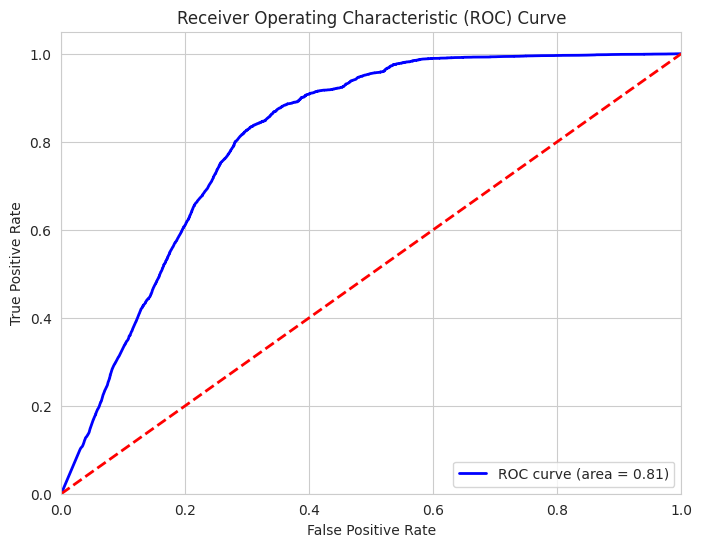

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     37343
           1       1.00      0.99      1.00     37334

    accuracy                           1.00     74677
   macro avg       1.00      1.00      1.00     74677
weighted avg       1.00      1.00      1.00     74677

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      0.35      0.52     66846
           1       0.18      0.99      0.30      9376

    accuracy                           0.43     76222
   macro avg       0.59      0.67      0.41     76222
weighted avg       0.90      0.43      0.49     76222

TRAIN CONFUSION MATRIX


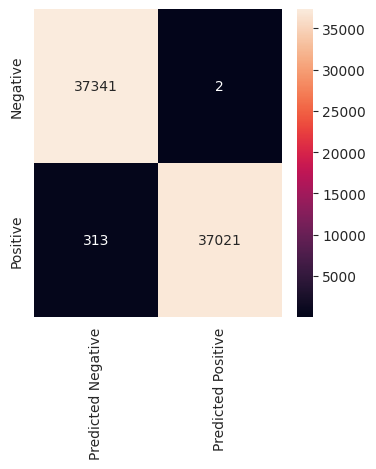

TEST CONFUSION MATRIX


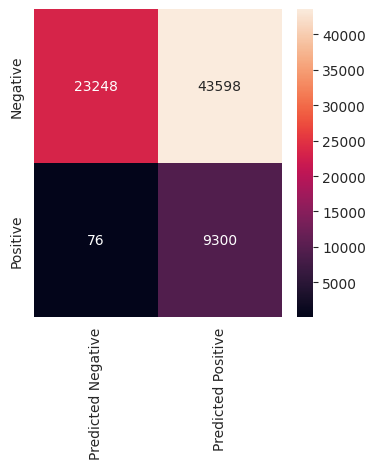

LogisticRegression(class_weight='balanced')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
iht = InstanceHardnessThreshold(random_state=0,
                                estimator=LogisticRegression(
                                    solver='lbfgs', multi_class='auto', max_iter=2000))
X_resampled_InstanceHardnessThreshold, y_resampled_InstanceHardnessThreshold = iht.fit_resample(X_train, y_train)
build_model(X_resampled_InstanceHardnessThreshold, X_test, y_resampled_InstanceHardnessThreshold, y_test, "balanced")

#### Filtrato

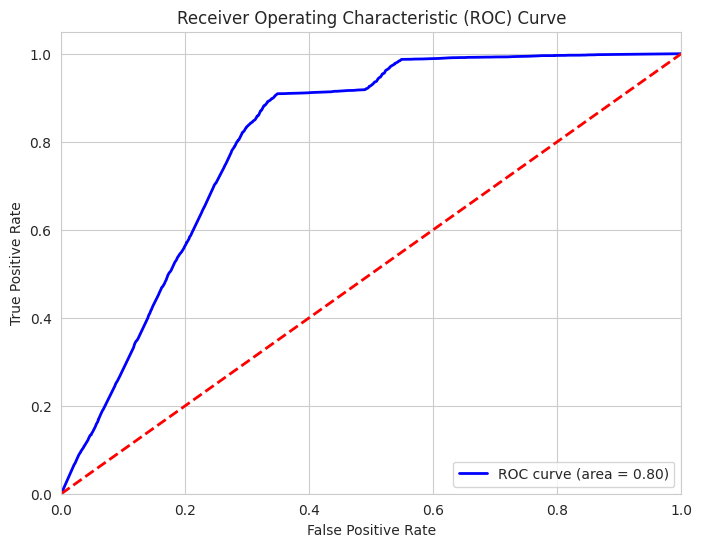

TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37337
           1       1.00      1.00      1.00     37334

    accuracy                           1.00     74671
   macro avg       1.00      1.00      1.00     74671
weighted avg       1.00      1.00      1.00     74671

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      0.20      0.34     66846
           1       0.15      1.00      0.26      9376

    accuracy                           0.30     76222
   macro avg       0.57      0.60      0.30     76222
weighted avg       0.89      0.30      0.33     76222

TRAIN CONFUSION MATRIX


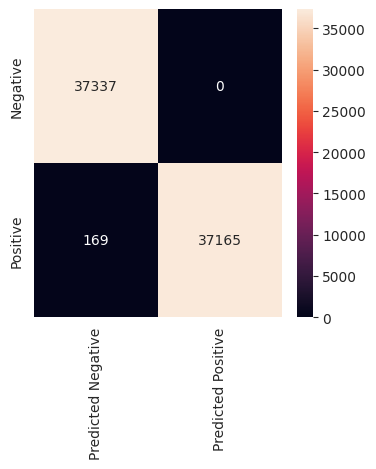

TEST CONFUSION MATRIX


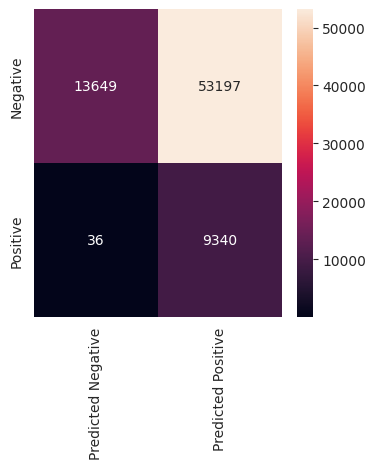

LogisticRegression(class_weight='balanced')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=.2, random_state=0)
iht = InstanceHardnessThreshold(random_state=0,
                                estimator=LogisticRegression(
                                    solver='lbfgs', multi_class='auto', max_iter=2000))
X_resampled_InstanceHardnessThreshold, y_resampled_InstanceHardnessThreshold = iht.fit_resample(X_train, y_train)
build_model(X_resampled_InstanceHardnessThreshold, X_test, y_resampled_InstanceHardnessThreshold, y_test, "balanced")

#### Conclusioni
Entrambi i modelli risultano essere praticamente perfetti con i dati di addestramento.

Mentre per la fase di test rimangono estremamente validi nell'evitare falsi negativi, tuttavia peggiorano molto per quanto riguarda la previsione dei valori positivi.

## Oversampling strategies

### SMOTE

#### Non Filtrato

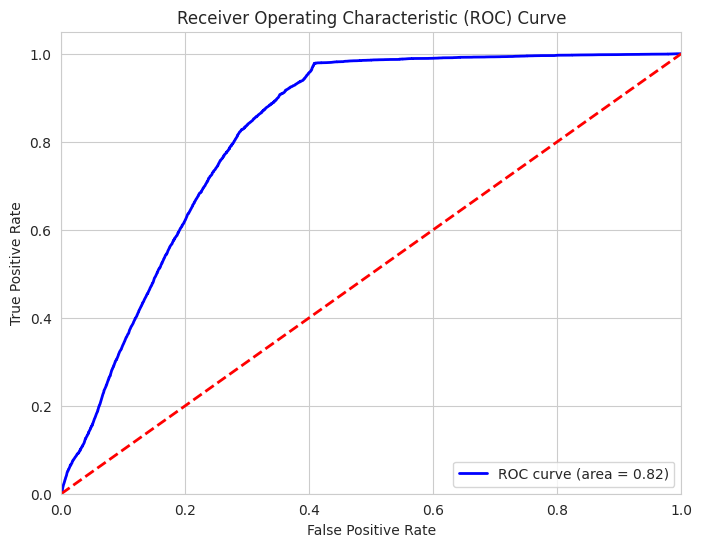

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    267553
           1       0.71      0.98      0.82    267553

    accuracy                           0.78    535106
   macro avg       0.83      0.78      0.78    535106
weighted avg       0.83      0.78      0.78    535106

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66846
           1       0.25      0.98      0.40      9376

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

TRAIN CONFUSION MATRIX


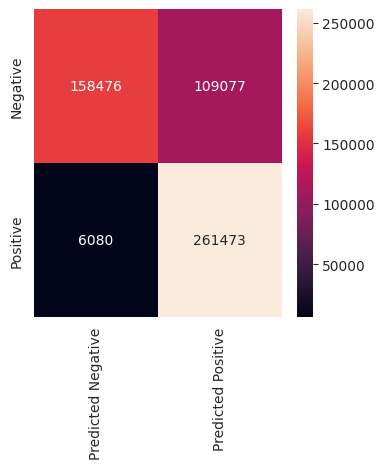

TEST CONFUSION MATRIX


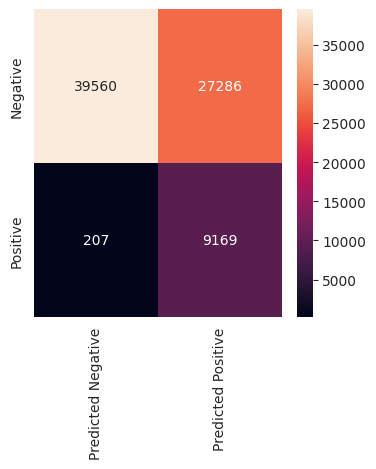

LogisticRegression(class_weight='balanced')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X_train, y_train)
build_model(X_resampled_smote, X_test, y_resampled_smote, y_test, "balanced")

#### Filtrato

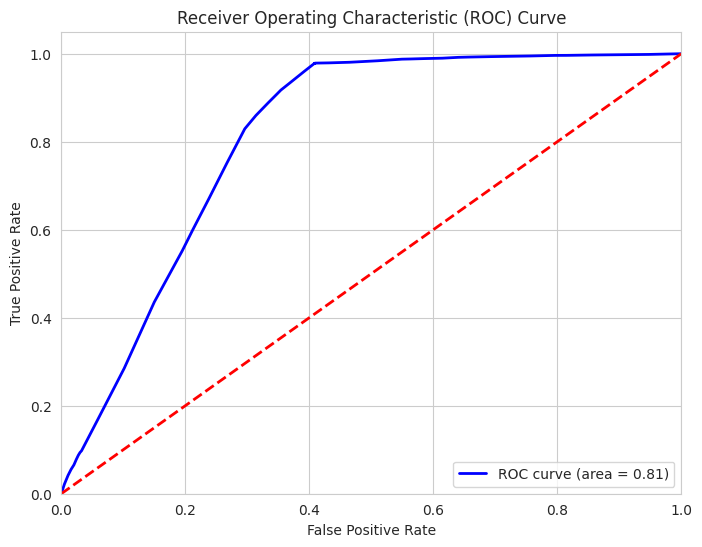

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    267553
           1       0.71      0.98      0.82    267553

    accuracy                           0.78    535106
   macro avg       0.83      0.78      0.78    535106
weighted avg       0.83      0.78      0.78    535106

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66846
           1       0.25      0.98      0.40      9376

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

TRAIN CONFUSION MATRIX


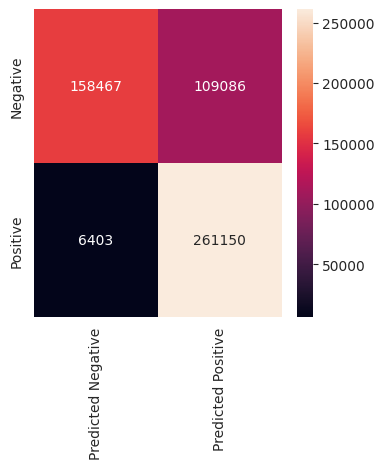

TEST CONFUSION MATRIX


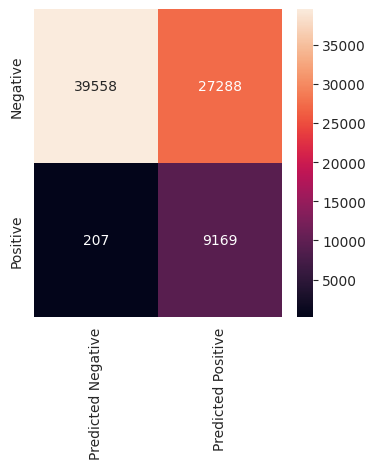

LogisticRegression(class_weight='balanced', max_iter=2000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=.2, random_state=0)

X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X_train, y_train)
build_model(X_resampled_smote, X_test, y_resampled_smote, y_test, "balanced")

### Borderline SMOTE

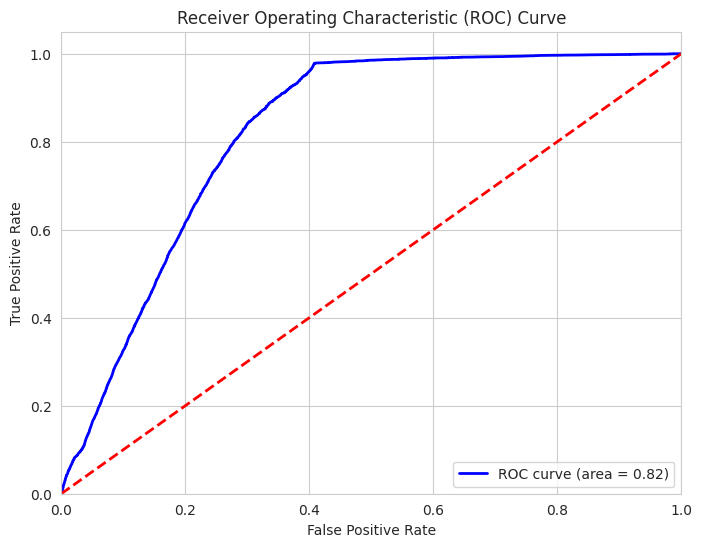

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.59      0.74    267553
           1       0.71      0.98      0.82    267553

    accuracy                           0.79    535106
   macro avg       0.84      0.79      0.78    535106
weighted avg       0.84      0.79      0.78    535106

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66846
           1       0.25      0.98      0.40      9376

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

TRAIN CONFUSION MATRIX


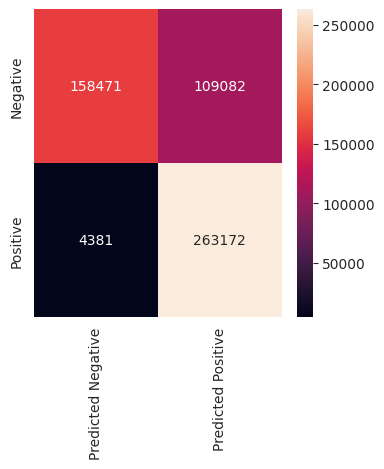

TEST CONFUSION MATRIX


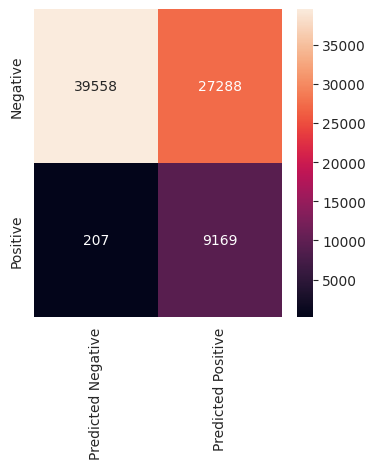

LogisticRegression(class_weight='balanced')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

X_resampled_border_smote, y_resampled_border_smote = BorderlineSMOTE().fit_resample(X_train, y_train)
build_model(X_resampled_border_smote, X_test, y_resampled_border_smote, y_test, "balanced")

### ADASYN

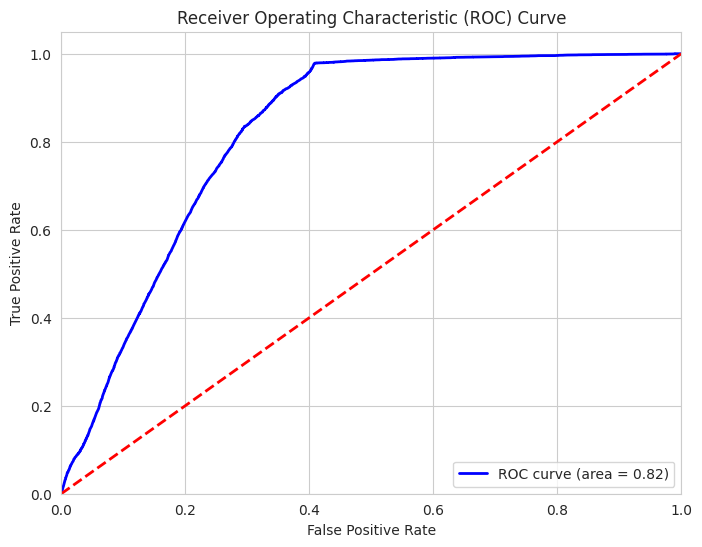

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    267553
           1       0.71      0.97      0.82    269176

    accuracy                           0.78    536729
   macro avg       0.83      0.78      0.77    536729
weighted avg       0.83      0.78      0.77    536729

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66846
           1       0.25      0.98      0.40      9376

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

TRAIN CONFUSION MATRIX


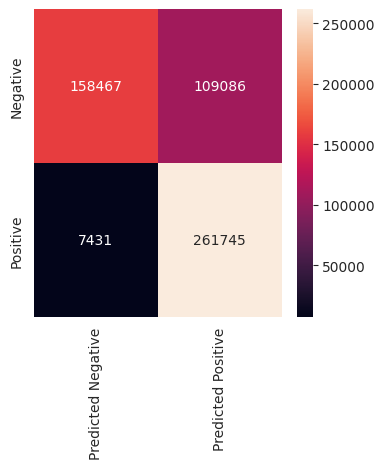

TEST CONFUSION MATRIX


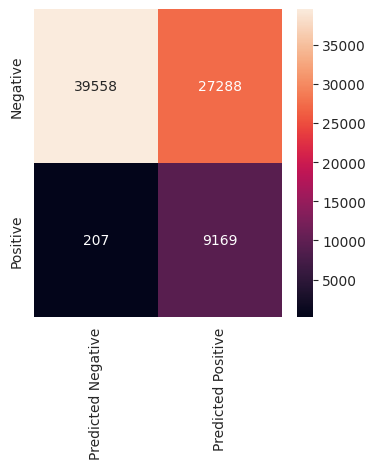

LogisticRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

X_resampled_adasyn, y_resampled_adasyn = ADASYN().fit_resample(X_train, y_train)
build_model(X_resampled_adasyn, X_test, y_resampled_adasyn, y_test, "balanced")

### Conclusioni
Tutti gli algoritmi di oversampling dimostrano prestazioni simili a quelle dell'algoritmo senza oversampling nè undersampling.

# Conclusioni finali e scelta modello

## Dataset finale

In [36]:
dataset_final = df2.copy()
dataset_final.head()

,Gender,Driving_License,Vehicle_Age,Response,Annual_Premium_class,New_Insured_With_Vehicle_Damage
0,1,1,3,1,2,True
1,1,1,2,0,1,False
2,1,1,3,1,2,True
3,1,1,1,0,1,False
4,2,1,1,0,1,False


### Distribuzione dei valori

In [37]:
value_distribution(dataset_final)

Value distribution for column: Gender
1: 206089 (54.08%)
2: 175020 (45.92%)


Value distribution for column: Driving_License
1: 380297 (99.79%)
0: 812 (0.21%)


Value distribution for column: Vehicle_Age
2: 200316 (52.56%)
1: 164786 (43.24%)
3: 16007 (4.20%)


Value distribution for column: Response
0: 334399 (87.74%)
1: 46710 (12.26%)


Value distribution for column: Annual_Premium_class
1: 135366 (35.52%)
0: 100963 (26.49%)
2: 90345 (23.71%)
3: 54435 (14.28%)


Value distribution for column: New_Insured_With_Vehicle_Damage
False: 198618 (52.12%)
True: 182491 (47.88%)




## Modello finale

In [38]:
X = dataset_final.drop(["Response"], axis=1).values
y = dataset_final["Response"].values

print(X.shape)
print(y.shape)

(381109, 5)
(381109,)


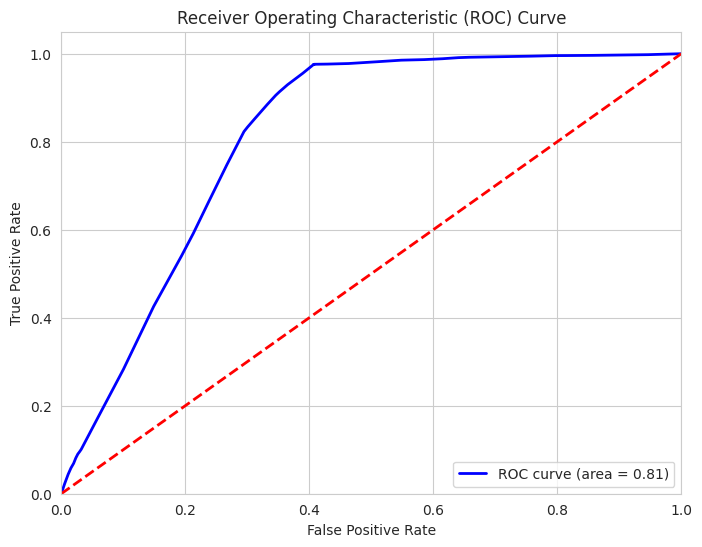

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    267519
           1       0.25      0.98      0.40     37368

    accuracy                           0.64    304887
   macro avg       0.62      0.78      0.57    304887
weighted avg       0.90      0.64      0.70    304887

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

TRAIN CONFUSION MATRIX


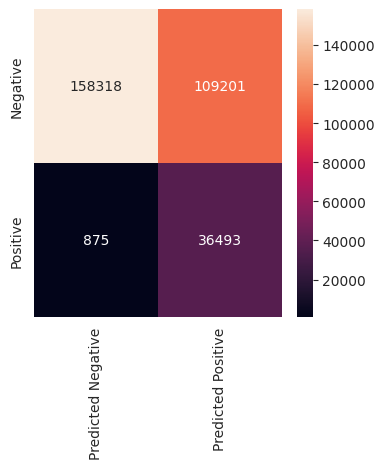

TEST CONFUSION MATRIX


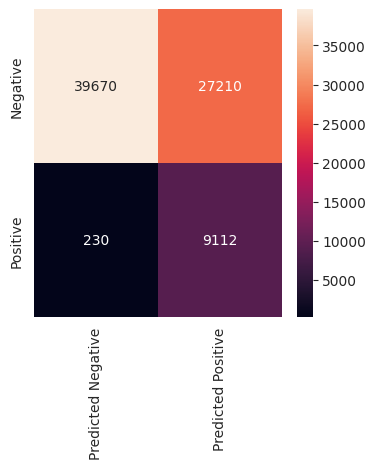

(76222, 5)
(76222,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify = y)
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)
model = build_model(X_train, X_test, y_train, y_test, "balanced")
print(X_test.shape)
print(y_test.shape)


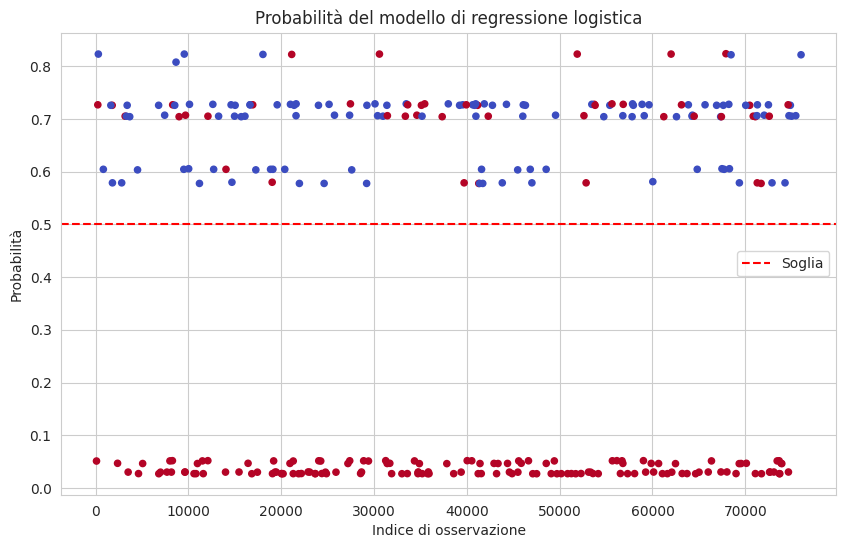

In [40]:
# Impostazione della soglia
threshold = 0.5
# Estrazione delle probabilità di classe positiva dal modello di regressione logistica
predicted_probabilities = model.predict_proba(X_test_scaled)[:, 1]
# Confronto delle previsioni del modello con la soglia per determinare se sono corrette o meno
predicted_labels = (predicted_probabilities > threshold).astype(int)
correct_predictions = (predicted_labels == y_test)

# Estrazione casuale di un campione di indici
sample_indices = np.random.choice(len(predicted_probabilities), size=300, replace=False)
sample_probabilities = predicted_probabilities[sample_indices]
sample_correct_predictions = correct_predictions[sample_indices]

# Grafico delle probabilità
plt.figure(figsize=(10, 6))
plt.scatter(sample_indices, sample_probabilities, c=sample_correct_predictions, cmap='coolwarm', s=20)
plt.axhline(y=threshold, color='r', linestyle='--', label='Soglia')
plt.xlabel('Indice di osservazione')
plt.ylabel('Probabilità')
plt.title('Probabilità del modello di regressione logistica')
plt.legend()
plt.show()

## Conclusioni Finali
Riassumendo il processo seguito:

- Abbiamo utilizzato il label encoding per convertire le variabili qualitative in formato stringa in numeriche, poiché la metodologia OneShotEncoding ha mostrato prestazioni inferiori nel test del modello e nella curva ROC.

- Alcune colonne come Region_Code e Vintage sono state eliminate poiché erano distribuite uniformemente all'interno del dataset e non contribuivano significativamente alla predizione della variabile obiettivo.

- Altre colonne come Age_Class sono state eliminate in quanto risultavano correlate con altre variabili che a loro volta erano maggiormente correlate alla variabile obiettivo.

- Data la natura del problema, di classificazione, la regressione logistica è l'unica scelta attuabile tra i modelli studiati.

- Nonostante siano state considerate varie opzioni, l'addestramento della regressione logistica con il parametro class_weight impostato su None non ha prodotto risultati soddisfacenti nei test.

- Anche l'impiego di tecniche di oversampling e undersampling non ha portato miglioramenti significativi nei test, sebbene alcune tecniche si siano dimostrate particolarmente efficaci nell'addestramento del modello.

- Il modello finale ha dimostrato eccellenti capacità nella predizione di osservazioni negative. Questo fornisce un vantaggio significativo per il business, consentendo un efficace filtraggio dei clienti da contattare per proporre una polizza aggiuntiva.

Senza l'utilizzo di questo modello, le risorse e il tempo impiegati per contattare i clienti aumenterebbero, con una conseguente riduzione dell'efficienza. E una percentuale significativamente inferiore di potenziali vendite sarebbe stata effettivamente conclusa.

In conclusione, l'implementazione di questo modello offre al business il vantaggio di consentire una gestione più mirata e efficiente delle risorse e una maggiore probabilità di successo nelle vendite di polizze aggiuntive.

### Alcune cifre di massima
- Accuratezza media del modello: 64%
- Probabilità di acquisto della polizza predetta dal modello: 25%
- Probabilità di acquisto effettivo dei clienti contattati senza il modello: 12.5%
- Aumento dei clienti contattati senza il modello: almeno del 50%
- Potenziali vendite perse con il modello: meno dell'1% basato sui dati di test.